In [72]:
# Import necessary libraries
import kagglehub
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Step 1: Download the dataset from Kaggle
# Replace with the correct Kaggle dataset ID
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

# Step 2: Locate the downloaded CSV file
dataset_file = next(
    (os.path.join(path, file_name) for file_name in os.listdir(path) if file_name.endswith(".csv")),
    None
)

# Step 3: Verify if a CSV file was found
if dataset_file is None:
    raise FileNotFoundError("No CSV file found in the downloaded dataset.")
else:
    print(f"CSV file found: {dataset_file}")


CSV file found: /Users/david/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1/diabetes_012_health_indicators_BRFSS2015.csv


In [73]:
# Import necessary libraries
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv(dataset_file)

# 1. Explore the dataset

print(f"\nShape of the dataset: {df.shape}")  # Dataset shape

print("\nDataset info:")
print(df.info())  # Data types and non-null counts

print("\nMissing values per column:")
print(df.isnull().sum())  # Missing values count

duplicates_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")  # Duplicate rows count

print("\nDescriptive statistics for numerical columns:")
print(df.describe())  # Summary stats for numerical columns

if 'Diabetes_012' in df.columns:
    print("\nValue counts for the target column 'Diabetes_012':")
    print(df['Diabetes_012'].value_counts())  # Target column distribution

# 2. Clean the dataset
if duplicates_count > 0:
    df = df.drop_duplicates()
    print(f"\nRemoved {duplicates_count} duplicate rows. New shape: {df.shape}")

missing_values_count = df.isnull().sum().sum()
if missing_values_count > 0:
    df = df.dropna()
    print(f"\nRemoved rows with missing values. New shape: {df.shape}")

df.columns = df.columns.str.lower().str.replace(' ', '_')
print("\nStandardized column names:")
print(df.columns)





Shape of the dataset: (253680, 22)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  G

In [16]:
df.describe()


,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [74]:
# Remove outliers only from the columns 'bmi' and 'age' as they are continuous features
columns_to_clean = ['bmi', 'age']

for col in columns_to_clean:
    q1 = df[col].quantile(0.25)  # First quartile
    q3 = df[col].quantile(0.75)  # Third quartile
    iqr = q3 - q1  # Interquartile range

    # Lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the dataset to keep only values within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Dataset after removing outliers in 'bmi' and 'age': {df.shape}")


Dataset after removing outliers in 'bmi' and 'age': (224143, 22)


In [ ]:
# 3. reviw if the  y  rariable is valance 
# 4. Split into training and testing

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Check the class distribution
print("Class distribution before balancing:")
class_counts = Counter(df['diabetes_012'])
print(class_counts)

# Separate features (X) and target variable (y)
X = df.drop(columns=['diabetes_012'])
y = df['diabetes_012']

# Apply SMOTE to balance the classes

# Split into training and testing (after balancing)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Class distribution before balancing:
Counter({0.0: 186589, 2.0: 33101, 1.0: 4453})
Class distribution after applying SMOTE:
Counter({0.0: 186589, 2.0: 186589, 1.0: 186589})
Training data: (447813, 21), Testing data: (111954, 21)


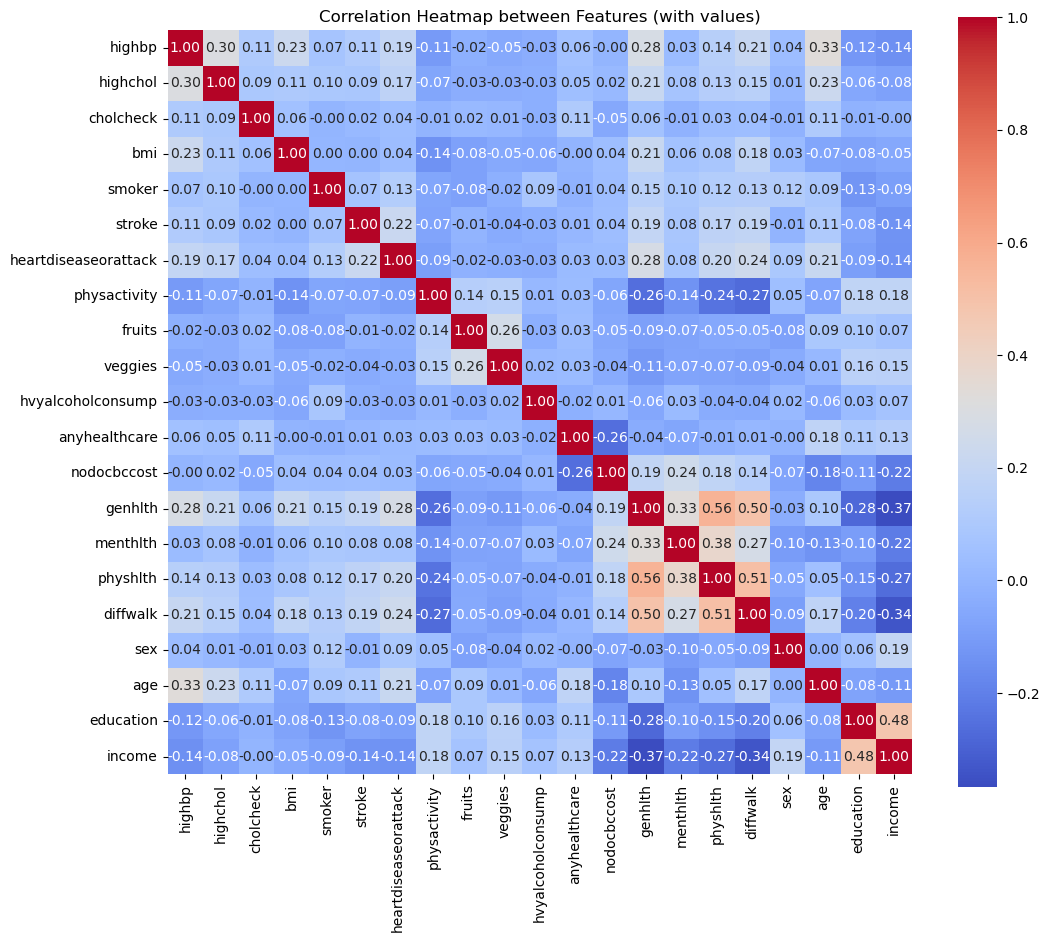

Pairs of features with high correlation (>|0.9|):
Features removed due to high correlation: set()
Dataset dimensions after feature reduction: (447813, 21)


In [76]:
# 5. Correlation analysis between features (to check for highly similar columns and assess the need for removal)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure X_train (training data) is defined after the split
# 1. Calculate the correlation matrix
correlation_matrix = X_train.corr()

# 2. Visualize the correlation matrix with numbers inside each square
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title("Correlation Heatmap between Features (with values)")
plt.show()

# 3. Identify pairs of highly correlated features
threshold = 0.9  # Define a threshold for high correlation
high_corr_pairs = []

# Iterate over the correlation matrix to find high correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j],
                                    correlation_matrix.iloc[i, j]))

# Display highly correlated feature pairs
print("Pairs of features with high correlation (>|0.9|):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} - Correlation: {pair[2]:.2f}")

# 4. Optional: Drop one variable from each pair of highly correlated features
# For simplicity, drop the second feature in each pair:
features_to_drop = set([pair[1] for pair in high_corr_pairs])
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

print(f"Features removed due to high correlation: {features_to_drop}")
print(f"Dataset dimensions after feature reduction: {X_train_reduced.shape}")


In [ ]:
# # Mostrar todas las columnas del DataFrame
# print("Columnas disponibles en el DataFrame:")
# print(df.columns)



Columnas disponibles en el DataFrame:
Index(['diabetes_012', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')


In [ ]:

from sklearn.preprocessing import StandardScaler  

# Lista de características continuas que se escalarán
continuous_features = ['age', 'bmi', 'income', 'menthlth', 'physhlth', 'education']  # Ajustar si es necesario

# Escalador StandardScaler (Media=0, Desviación Estándar=1)
scaler = StandardScaler()

# Escalar solo las características continuas en el conjunto de entrenamiento
X_train_scaled = X_train.copy()
X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])

# Usar el mismo escalador para transformar el conjunto de prueba
X_test_scaled = X_test.copy()
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])

# Verificar resultados del escalado
print("Características continuas escaladas:")
print(f"Media de entrenamiento después del escalado:\n{X_train_scaled[continuous_features].mean()}")
print(f"Desviación estándar de entrenamiento después del escalado:\n{X_train_scaled[continuous_features].std()}")






Características continuas escaladas:
Media de entrenamiento después del escalado:
age         -6.658090e-16
bmi         -8.071201e-16
income       3.333012e-16
menthlth    -5.653395e-17
physhlth    -1.952825e-16
education   -9.455434e-16
dtype: float64
Desviación estándar de entrenamiento después del escalado:
age          1.000001
bmi          1.000001
income       1.000001
menthlth     1.000001
physhlth     1.000001
education    1.000001
dtype: float64


In [ ]:
# What Data Should You Use for Training the Model:
# You should use:

# X_train_scaled: Scaled training features.
# y_train: Corresponding target variable for the training set.





# For Model Evaluation (Testing):
# You should use:

# X_test_scaled: Scaled testing features.
# y_test: Corresponding target variable for the testing set.